In [95]:
import torch
from srcnn import SRCNN
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from interpolate import linear_interpolate
import tifffile

In [96]:
model = SRCNN()
model.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.1092 output/model_ckpt.pth")['model_state_dict'])
model.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [93]:
data_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/main_batch/pmc_0.1092/test/convolutions/"    # directory to superresolve images from
save_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/omnipose_training/pmc_0.1092_SR/test/convolutions/"        # directory to save superresolved images 

In [94]:
for file in os.listdir(data_dir):
    img = linear_interpolate(np.array(tifffile.imread(data_dir+file),dtype=np.float32),(256,46))
    img = img.reshape(1,img.shape[0],img.shape[1])
    img = (img//256.)/255.
    img = torch.tensor(img, dtype=torch.float)
    with torch.no_grad():
        pred = (np.array(model(img)).reshape(256,46)*255).astype(int)
    pred = Image.fromarray(pred)
    pred.save(save_dir+file[:-3]+"png")

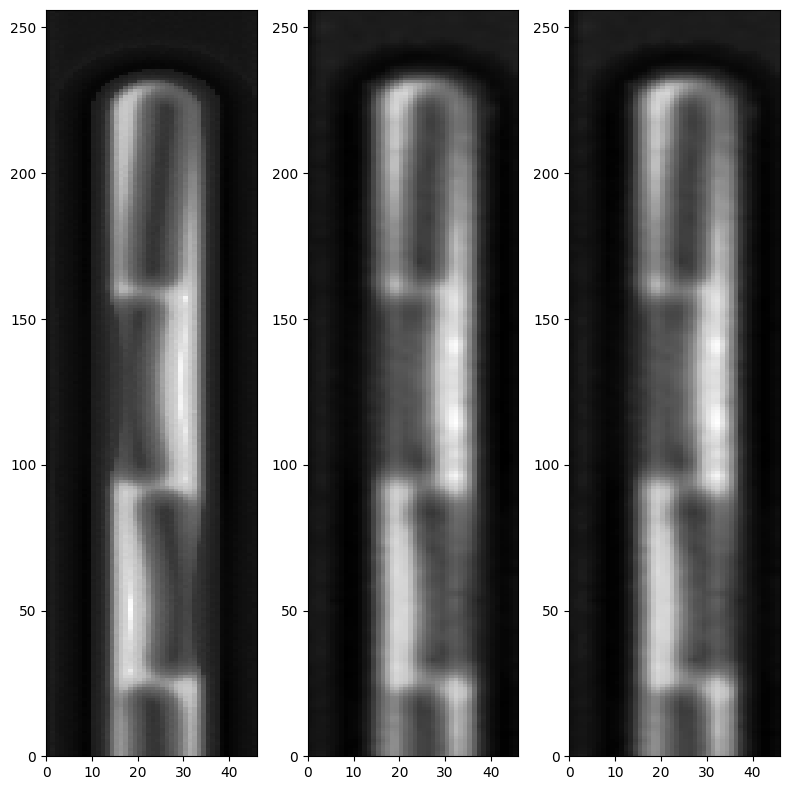

In [41]:
fig,axs = plt.subplots(1,3,figsize=(8,8))
axs[0].pcolor(np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.0655/synth_00000_pmc_0.0655.png"))[::-1],cmap="Greys_r")
axs[1].pcolor(np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.1638/synth_00000_pmc_0.1638.png"))[::-1],cmap="Greys_r")
axs[2].pcolor((np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.1638/synth_00000_pmc_0.1638.png"))//255)[::-1],cmap="Greys_r")
fig.tight_layout()
plt.show()

In [51]:
(np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/first_trial/SR_training/pmc_0.0655/synth_00000_pmc_0.0655.png"))//256).shape

(256, 46)

In [61]:
65535//256.

255.0